In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### Retailrocket recommender system dataset

Source: https://www.kaggle.com/retailrocket/ecommerce-dataset

Load the dataset files.

In [2]:
events = pd.read_csv(os.path.join(\
    '..', 'timeseries_lec_data', 'events.csv'))
item_properties = pd.read_csv(os.path.join(\
    '..', 'timeseries_lec_data', 'item_properties_part1.csv'))
category_tree = pd.read_csv(os.path.join(\
    '..', 'timeseries_lec_data', 'category_tree.csv'))

In [3]:
events

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN
...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,NaN
2756097,1438399813142,762376,view,115946,NaN
2756098,1438397820527,1251746,view,78144,NaN
2756099,1438398530703,1184451,view,283392,NaN


In [4]:
item_properties

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513
...,...,...,...,...
10999994,1439694000000,86599,categoryid,618
10999995,1435460400000,153032,1066,n1020.000 424566
10999996,1440298800000,421788,888,35975 856003 37346
10999997,1437879600000,159792,400,n552.000 639502 n720.000 424566


In [5]:
category_tree

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0
...,...,...
1664,49,1125.0
1665,1112,630.0
1666,1336,745.0
1667,689,207.0


## Exploratory Data Analysis (EDA)

EDA is about understanding the data and forming hypotheses about it. 

- Visualizing Data: Histograms, scatter plots, box plots, etc., to understand distributions and relationships.
- Summary Statistics: Calculating mean, median, mode, standard deviation, and correlation to gain insights into the dataset.
- Detecting Outliers: Identifying values that deviate significantly from the rest of the data.
- Assessing Data Types and Structure: Checking data types, unique values, and identifying missing values.

#### Q1: Convert timestamp into corresponding date.

In [6]:
# Convert timestamp to datetime (milliseconds to seconds)
events['event_datetime'] = pd.to_datetime(events['timestamp'], unit='ms')
events

,timestamp,visitorid,event,itemid,transactionid,event_datetime
0,1433221332117,257597,view,355908,NaN,2015-06-02 05:02:12.117
1,1433224214164,992329,view,248676,NaN,2015-06-02 05:50:14.164
2,1433221999827,111016,view,318965,NaN,2015-06-02 05:13:19.827
3,1433221955914,483717,view,253185,NaN,2015-06-02 05:12:35.914
4,1433221337106,951259,view,367447,NaN,2015-06-02 05:02:17.106
...,...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,NaN,2015-08-01 03:13:05.939
2756097,1438399813142,762376,view,115946,NaN,2015-08-01 03:30:13.142
2756098,1438397820527,1251746,view,78144,NaN,2015-08-01 02:57:00.527
2756099,1438398530703,1184451,view,283392,NaN,2015-08-01 03:08:50.703


In [7]:
events['event_date'] = events['event_datetime'].dt.date
events

,timestamp,visitorid,event,itemid,transactionid,event_datetime,event_date
0,1433221332117,257597,view,355908,NaN,2015-06-02 05:02:12.117,2015-06-02
1,1433224214164,992329,view,248676,NaN,2015-06-02 05:50:14.164,2015-06-02
2,1433221999827,111016,view,318965,NaN,2015-06-02 05:13:19.827,2015-06-02
3,1433221955914,483717,view,253185,NaN,2015-06-02 05:12:35.914,2015-06-02
4,1433221337106,951259,view,367447,NaN,2015-06-02 05:02:17.106,2015-06-02
...,...,...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,NaN,2015-08-01 03:13:05.939,2015-08-01
2756097,1438399813142,762376,view,115946,NaN,2015-08-01 03:30:13.142,2015-08-01
2756098,1438397820527,1251746,view,78144,NaN,2015-08-01 02:57:00.527,2015-08-01
2756099,1438398530703,1184451,view,283392,NaN,2015-08-01 03:08:50.703,2015-08-01


#### Q2: Compute total count of each event type (`views`, `addtocart`, `transaction`) per item per day.

In [8]:
events['event'].unique()

array(['view', 'addtocart', 'transaction'], dtype=object)

In [9]:
grouped_events = events.groupby(['event_date', 'itemid', 'event']).size()
grouped_events

event_date  itemid  event    
2015-05-03  16      view         1
            19      view         1
            32      view         1
            33      addtocart    1
                    view         1
                                ..
2015-09-18  464474  view         2
            464538  view         1
            465387  view         1
            466321  view         1
            466436  view         1
Length: 1743102, dtype: int64

In [11]:
grouped_events = events.groupby(['event_date', 'itemid', 'event']).size().\
                                reset_index(name='event_count')
grouped_events

,event_date,itemid,event,event_count
0,2015-05-03,16,view,1
1,2015-05-03,19,view,1
2,2015-05-03,32,view,1
3,2015-05-03,33,addtocart,1
4,2015-05-03,33,view,1
...,...,...,...,...
1743097,2015-09-18,464474,view,2
1743098,2015-09-18,464538,view,1
1743099,2015-09-18,465387,view,1
1743100,2015-09-18,466321,view,1


#### Q3: Compute top 10 items with the highest number of `view` events.

In [12]:
grouped_events['event'] == 'view'

0           True
1           True
2           True
3          False
4           True
           ...  
1743097     True
1743098     True
1743099     True
1743100     True
1743101     True
Name: event, Length: 1743102, dtype: bool

In [13]:
top_view_items = grouped_events[grouped_events['event'] == 'view'].\
                    sort_values(by='event_count', ascending=False).head(10)
top_view_items

,event_date,itemid,event,event_count
440229,2015-06-06,5411,view,333
489069,2015-06-10,5411,view,303
1103845,2015-07-26,149275,view,300
474561,2015-06-09,5411,view,272
276694,2015-05-24,290250,view,251
1714225,2015-09-15,17114,view,248
993175,2015-07-18,115323,view,234
238643,2015-05-21,211811,view,216
1725707,2015-09-15,434782,view,198
1208429,2015-08-03,162139,view,166


#### Q4: What is the distribution of event types (view, transaction, etc.) in the events dataset?

event
view           2664312
addtocart        69332
transaction      22457
Name: count, dtype: int64


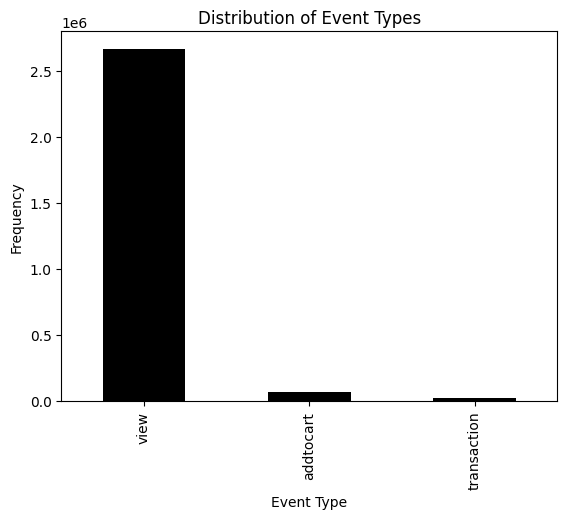

In [14]:
event_type_counts = events['event'].value_counts()
print(event_type_counts)

event_type_counts.plot(kind='bar', color='black')
plt.title('Distribution of Event Types')
plt.xlabel('Event Type')
plt.ylabel('Frequency')
plt.show()

#### Q5: How many different items are in the dataset?

In [15]:
unique_items = events['itemid'].nunique()
unique_items

235061

#### Q6: What is the average number of events per visitor?

In [16]:
events_per_visitor = events.groupby('visitorid').size()
avg_events_per_visitor = events_per_visitor.mean()
avg_events_per_visitor

np.float64(1.9580421716705267)

#### Q7: How many unique transactions are in the dataset?

In [17]:
unique_transactions = events['transactionid'].nunique()
unique_transactions

17672

#### Q8: What is the distribution of transactions?

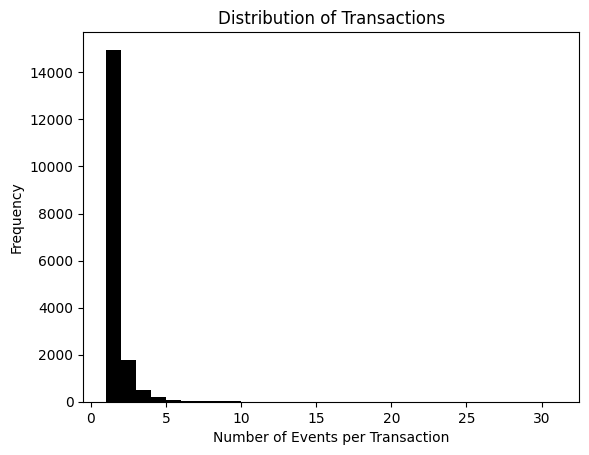

In [18]:
transaction_counts = events[events['transactionid'].notnull()]\
                        ['transactionid'].value_counts()

transaction_counts.plot(kind='hist', bins=30, color='black')
plt.title('Distribution of Transactions')
plt.xlabel('Number of Events per Transaction')
plt.ylabel('Frequency')
plt.show()

#### Q9: How many events happen on average per day?

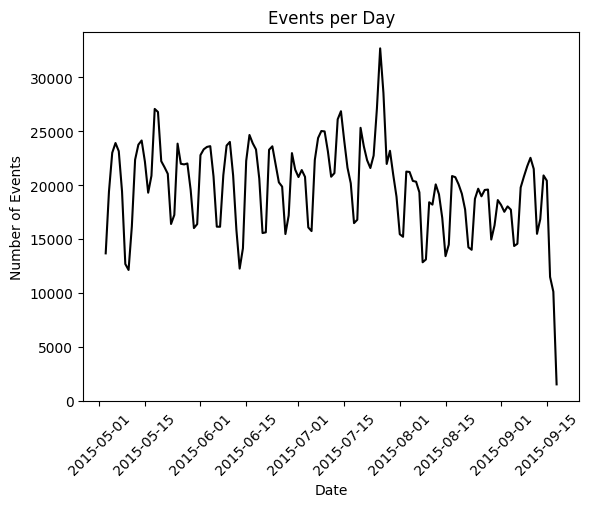

In [19]:
events_per_day = events.groupby(events['event_date']).size()

avg_events_per_day = events_per_day.mean()

events_per_day.plot(kind='line', title='Events per Day', color='black')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.show()

#### Q10: Left join `events` with `item_properties`.

In [20]:
merged_data = pd.merge(events, item_properties, on='timestamp', how='left')
merged_data

,timestamp,visitorid,event,itemid_x,transactionid,event_datetime,event_date,itemid_y,property,value
0,1433221332117,257597,view,355908,NaN,2015-06-02 05:02:12.117,2015-06-02,NaN,NaN,NaN
1,1433224214164,992329,view,248676,NaN,2015-06-02 05:50:14.164,2015-06-02,NaN,NaN,NaN
2,1433221999827,111016,view,318965,NaN,2015-06-02 05:13:19.827,2015-06-02,NaN,NaN,NaN
3,1433221955914,483717,view,253185,NaN,2015-06-02 05:12:35.914,2015-06-02,NaN,NaN,NaN
4,1433221337106,951259,view,367447,NaN,2015-06-02 05:02:17.106,2015-06-02,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,NaN,2015-08-01 03:13:05.939,2015-08-01,NaN,NaN,NaN
2756097,1438399813142,762376,view,115946,NaN,2015-08-01 03:30:13.142,2015-08-01,NaN,NaN,NaN
2756098,1438397820527,1251746,view,78144,NaN,2015-08-01 02:57:00.527,2015-08-01,NaN,NaN,NaN
2756099,1438398530703,1184451,view,283392,NaN,2015-08-01 03:08:50.703,2015-08-01,NaN,NaN,NaN


#### Q11: Convert `parentid` column to `int32` type.

In [21]:
category_tree

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0
...,...,...
1664,49,1125.0
1665,1112,630.0
1666,1336,745.0
1667,689,207.0


In [25]:
category_tree_v2 = category_tree.copy()

In [28]:
category_tree_v2.parentid = category_tree_v2.parentid.astype("int32")
category_tree_v2

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer